In [ ]:
import pandas as pd

In [ ]:
data=pd.read_excel('/content/loan_Sanction_status.xlsx')

In [ ]:
data.describe()

,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,262.075532,1.200355,0.643617,0.755319,1.214539,0.148936,5466.436170,1530.448440,342.595745,0.842199,1.969858,0.682624
std,818.638819,0.400621,0.479355,1.016938,0.410867,0.356342,6271.344106,2471.721359,63.838715,0.364878,0.784494,0.465868
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,150.000000,0.000000,36.000000,0.000000,1.000000,0.000000
25%,100.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2892.750000,0.000000,360.000000,1.000000,1.000000,0.000000
50%,128.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3815.000000,1105.500000,360.000000,1.000000,2.000000,1.000000
75%,172.250000,1.000000,1.000000,2.000000,1.000000,0.000000,5803.750000,2250.000000,360.000000,1.000000,3.000000,1.000000
max,12400.200000,2.000000,1.000000,3.000000,2.000000,1.000000,81000.000000,33837.000000,480.000000,1.000000,3.000000,1.000000


In [ ]:
# prompt: check missing values

data.isnull().sum()


,0
Loan_ID,0
LoanAmount,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
Loan_Amount_Term,0


In [ ]:
# prompt: check duplicate rows across all columns

duplicate_rows = data[data.duplicated(keep=False)]
print("Duplicate Rows:")
print(duplicate_rows)
print("Number of duplicate rows:", len(duplicate_rows))


Duplicate Rows:
Empty DataFrame
Columns: [Loan_ID, LoanAmount, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
Number of duplicate rows: 0


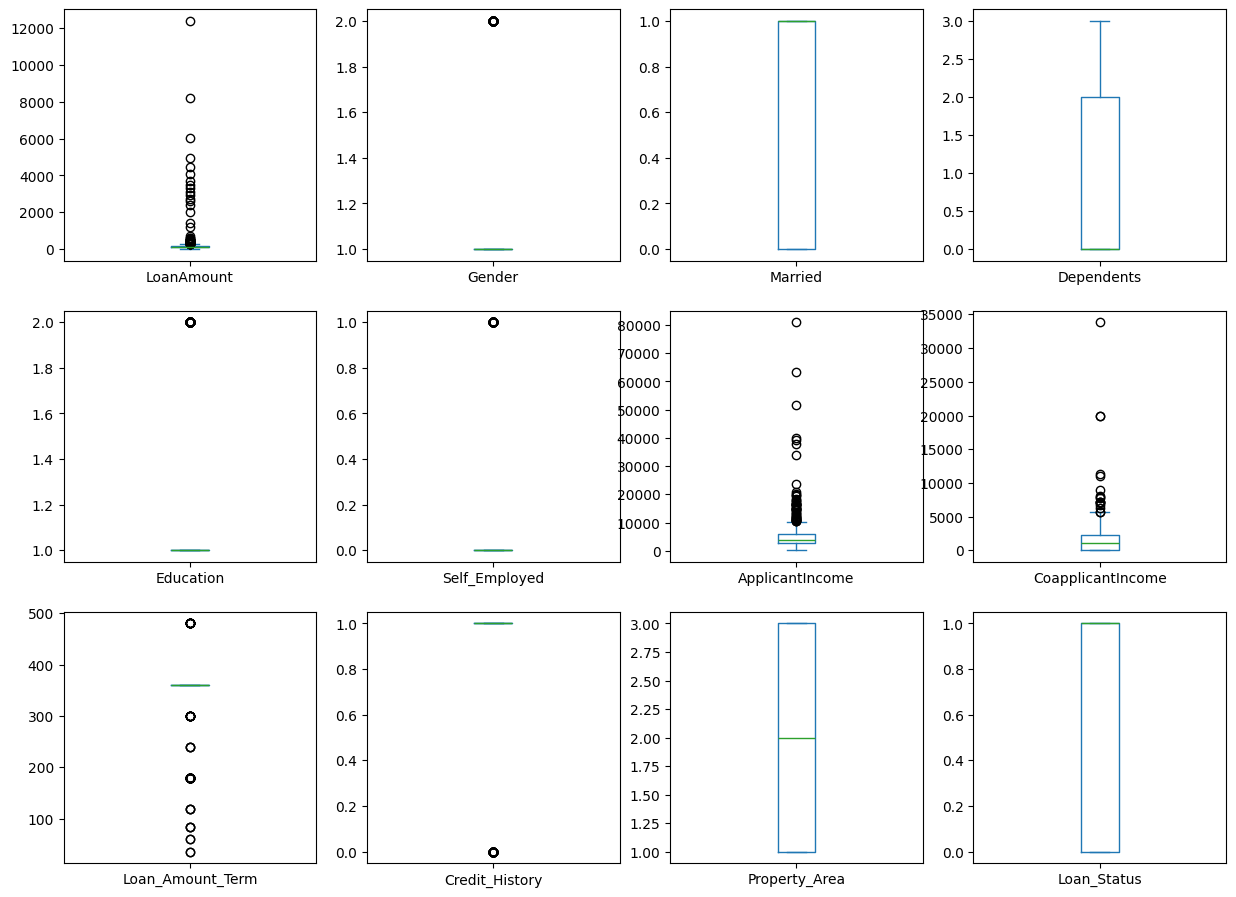

In [ ]:
# prompt: Generate box plot for all columns

import matplotlib.pyplot as plt
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15))
plt.show()


In [ ]:
# prompt: Use iqr to treat the outliers only in loan amount

import pandas as pd
import numpy as np

# Calculate Q1, Q3, and IQR for 'LoanAmount'
Q1 = data['LoanAmount'].quantile(0.25)
Q3 = data['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['LoanAmount'] < lower_bound) | (data['LoanAmount'] > upper_bound)]

# Replace outliers with the upper or lower bound (you can choose a different strategy)
data['LoanAmount'] = np.where(data['LoanAmount'] < lower_bound, lower_bound, data['LoanAmount'])
data['LoanAmount'] = np.where(data['LoanAmount'] > upper_bound, upper_bound, data['LoanAmount'])

# Now 'data' has treated outliers in the 'LoanAmount' column


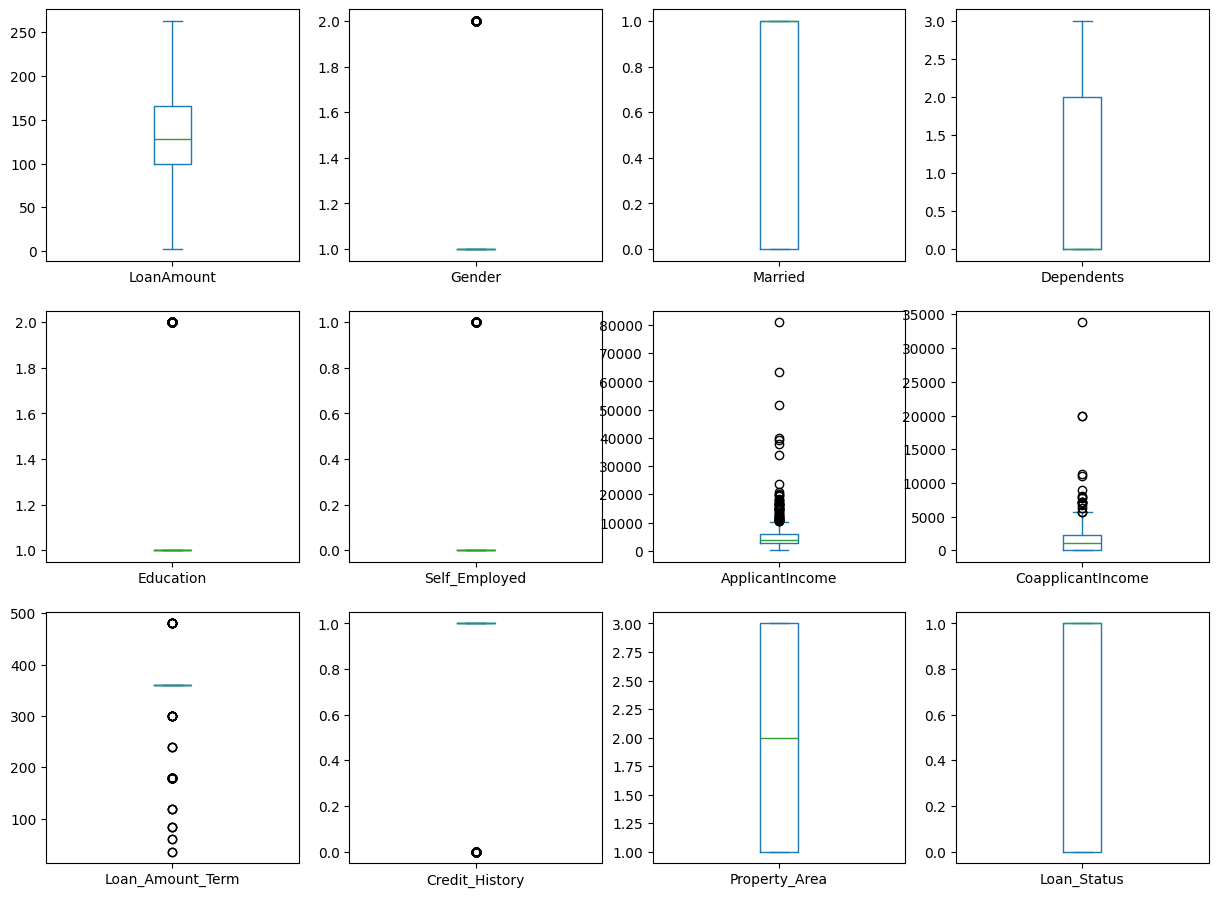

In [ ]:
# prompt: Generate box plot for all columns

import matplotlib.pyplot as plt
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15))
plt.show()


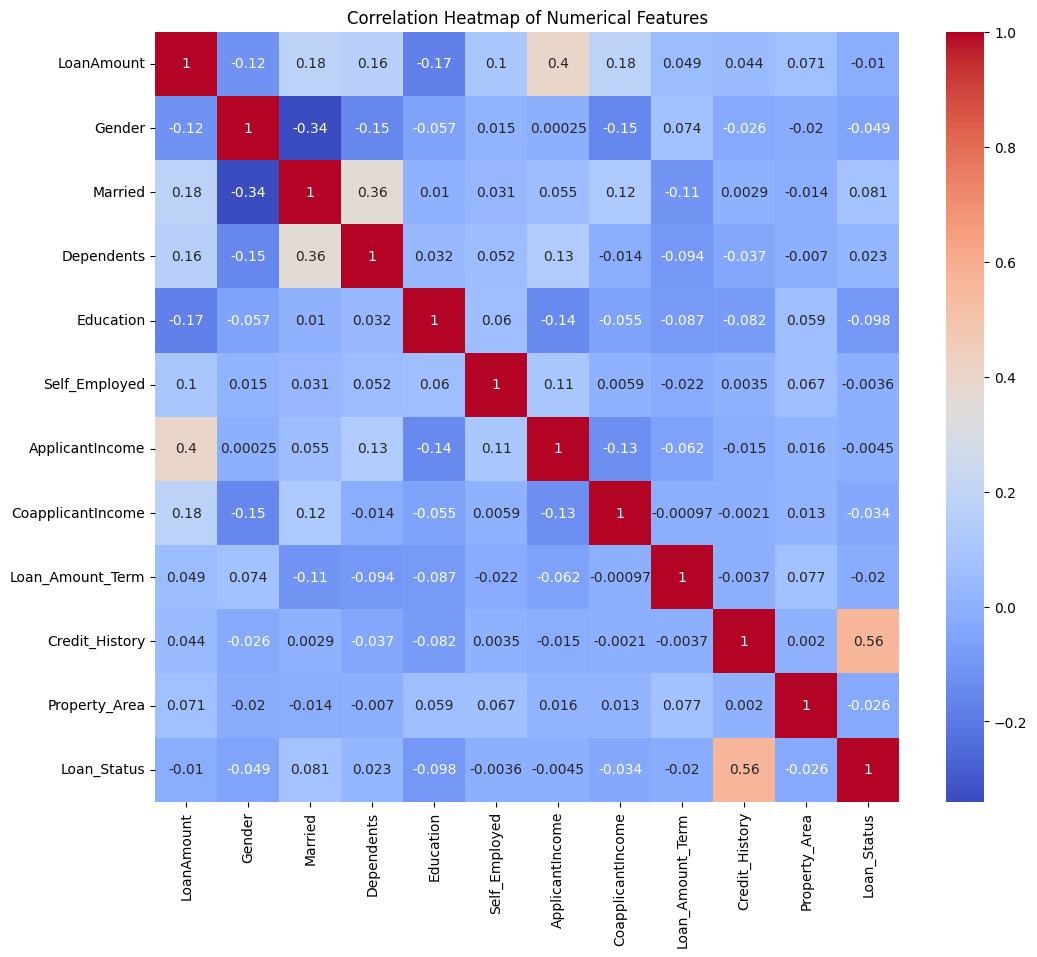

In [ ]:
# prompt: extract heatmap for all numerical columns

import seaborn as sns

# Assuming 'data' is your DataFrame
numerical_cols = data.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, 10))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Confusion Matrix:
[[21 18]
 [ 1 73]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


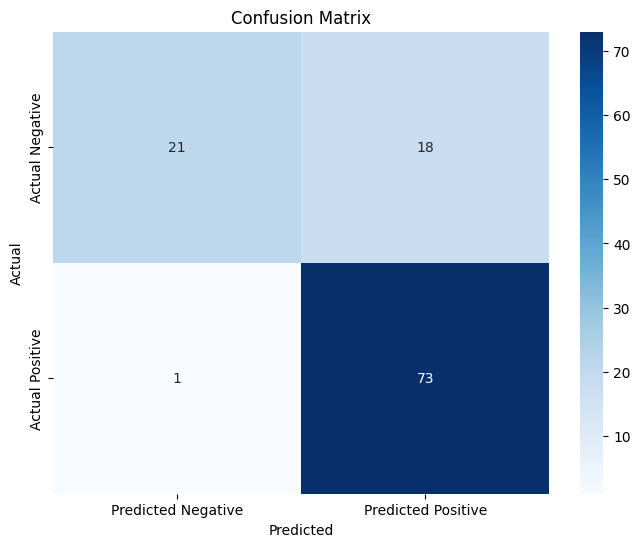

In [ ]:
# prompt: extract confusion matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# ... (your existing code) ...

# Assuming 'X' is your feature matrix and 'y' is your target variable
X = data.drop('Loan_Status', axis=1)  # Replace 'Loan_Status' with your target column name
y = data['Loan_Status']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a classifier (example using Logistic Regression)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# prompt: using stats model define y as Loan_Status column and perform logistic regression

import statsmodels.api as sm

# Define the dependent variable (y)
y = data['Loan_Status']

# Define the independent variables (X) -  exclude 'Loan_Status' and any other non-numerical columns
X = data.drop('Loan_Status', axis=1)
X = X.select_dtypes(include=np.number) # Ensure only numerical features are used

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the model summary
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.458672
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  564
Model:                          Logit   Df Residuals:                      552
Method:                           MLE   Df Model:                           11
Date:                Wed, 02 Apr 2025   Pseudo R-squ.:                  0.2660
Time:                        05:24:50   Log-Likelihood:                -258.69
converged:                       True   LL-Null:                       -352.43
Covariance Type:            nonrobust   LLR p-value:                 2.921e-34
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2936      1.009     -1.282      0.200      -3.272       0.685
LoanAmou

In [ ]:
# prompt: perform step by step regression and drop insignificant columns one by one

import pandas as pd
import statsmodels.api as sm

def stepwise_regression(X, y):
    """
    Performs stepwise regression to identify significant predictors.
    """
    # Add a constant to the independent variables (intercept term)
    X = sm.add_constant(X)

    included_features = list(X.columns)
    significant_features = []
    while True:
        # Fit the model with the current set of features
        model = sm.Logit(y, X[included_features]).fit(disp=0)  # Suppress unnecessary output

        # Find the least significant feature (highest p-value)
        p_values = model.pvalues[1:]  # Exclude the constant
        max_p_value = p_values.max()
        least_significant_feature = p_values.idxmax()

        if max_p_value > 0.05:
            # Remove the least significant feature if its p-value is above the threshold
            included_features.remove(least_significant_feature)
            print(f"Removed feature: {least_significant_feature}, p-value: {max_p_value:.4f}")
        else:
            # All remaining features are significant
            significant_features = included_features.copy()
            break

    return significant_features, model

# Example usage (assuming you have your data and dependent variable 'y' defined)
# Define the independent variables (X) - exclude 'Loan_Status' and any other non-numerical columns
X = data.drop('Loan_Status', axis=1)
X = X.select_dtypes(include=np.number) # Ensure only numerical features are used

# perform the stepwise regression
significant_features, final_model = stepwise_regression(X,y)


print("\nFinal Model Summary:")
print(final_model.summary())
print("\nSignificant features:", significant_features)


Removed feature: Self_Employed, p-value: 0.9309
Removed feature: ApplicantIncome, p-value: 0.8292
Removed feature: Loan_Amount_Term, p-value: 0.7187
Removed feature: Dependents, p-value: 0.6683
Removed feature: Gender, p-value: 0.6021
Removed feature: Property_Area, p-value: 0.5587
Removed feature: CoapplicantIncome, p-value: 0.2039
Removed feature: Education, p-value: 0.1206
Removed feature: LoanAmount, p-value: 0.1172

Final Model Summary:
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  564
Model:                          Logit   Df Residuals:                      561
Method:                           MLE   Df Model:                            2
Date:                Wed, 02 Apr 2025   Pseudo R-squ.:                  0.2555
Time:                        05:41:22   Log-Likelihood:                -262.39
converged:                       True   LL-Null:                       -352.43
C

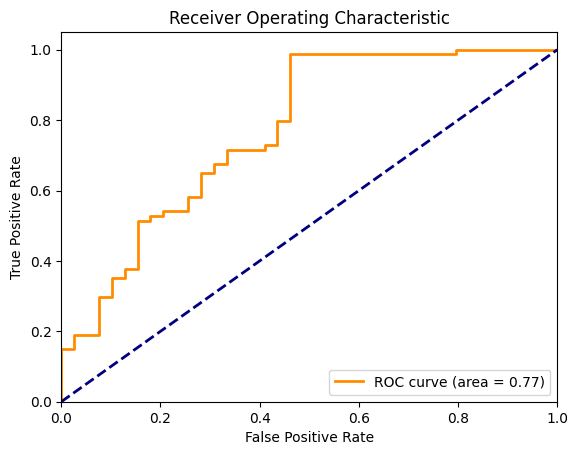

In [ ]:
# prompt: generate classification table and auc curve using statsmodel

from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_pred_prob are defined
# y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Interpretation:
The Loan Sanction Status dataset includes various details like loan amount, gender, marital status, education, etc. Before using all these variables, we need to check which ones are important and which ones can be removed.
Since the loan approval outcome is either "approved" or "not approved" (a binary result), we will use Logistic Regression to analyze the data. First, we will clean the data and then proceed with the analysis.
Using XRealStats, we run Logistic Regression, and the first set of results is in the ‘Soln1’ sheet. From the results, we see that only Credit History is significant, while the other variables are not. To refine the model, we will gradually remove the least important variables, one by one, and re-run the regression until only significant variables remain.
We first remove Self Employment because it has the highest p-value (0.93), meaning it doesn’t contribute to loan approval. After removing this, we run the regression again. We continue this process, eliminating Applicant Income, Loan Amount Term, Dependents, Gender, Property Area, Co Applicant Income, Education, and Loan Amount, until only the significant variables remain—Credit History and Marital Status.
This method is called Feature Engineering, where we identify the most significant variables for predicting loan approval.


This process ensures that the final model is the best fit for predicting loan approvals by keeping only the most relevant variables. The closer the predicted values are to actual results, the more reliable the model becomes.

